In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# pull in given csv
file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"

In [7]:
df = pd.read_csv(file)

In [9]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [37]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [43]:
df.exam3.value_counts(ascending=True)

exam3
       1
95     8
87     8
86     8
85     8
94     8
79     8
70     8
75    15
96    16
78    16
Name: count, dtype: int64

In [47]:
df[df.exam3 == ' ']

,student_id,exam1,exam2,exam3,final_grade
11,12,57.0,65,,65


In [15]:
from env import deploy_wrangle

In [17]:
deploy_wrangle()

In [19]:
import wrangle

In [21]:
wrangle.df_info(df)

,nunique,dtypes,isnull,32
student_id,104,int64,0,33
exam1,12,float64,1,92.0
exam2,8,int64,0,89
exam3,11,object,0,94
final_grade,13,int64,0,93


In [23]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


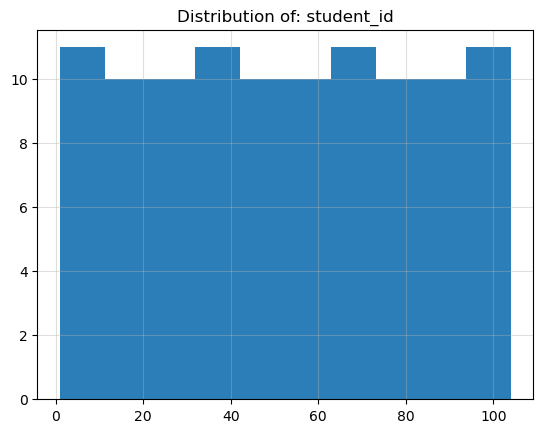

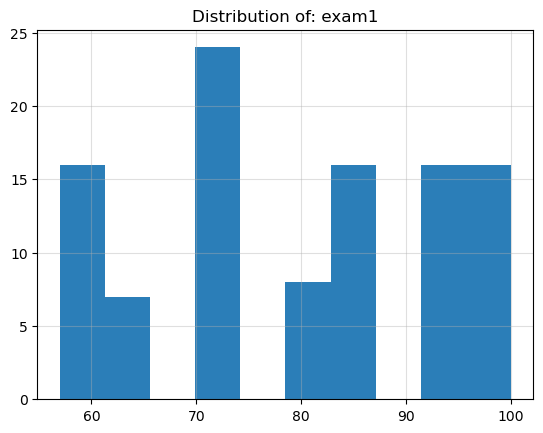

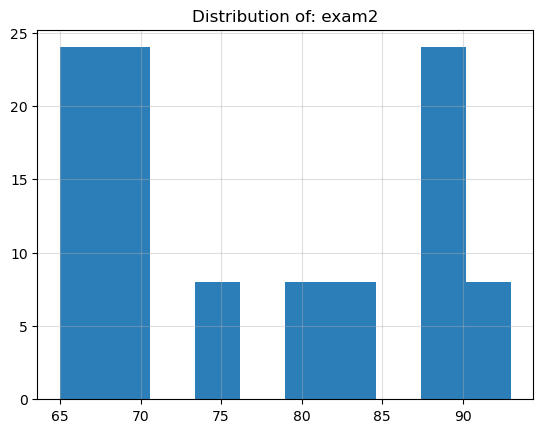

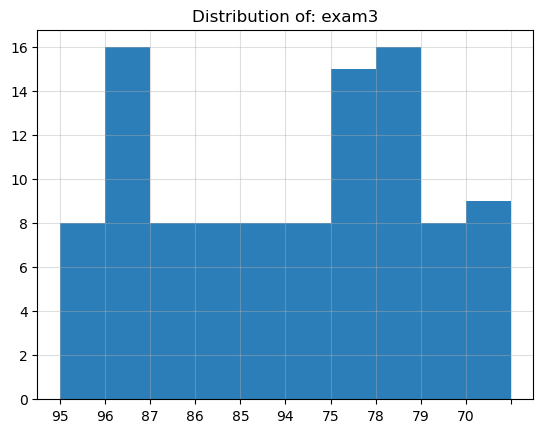

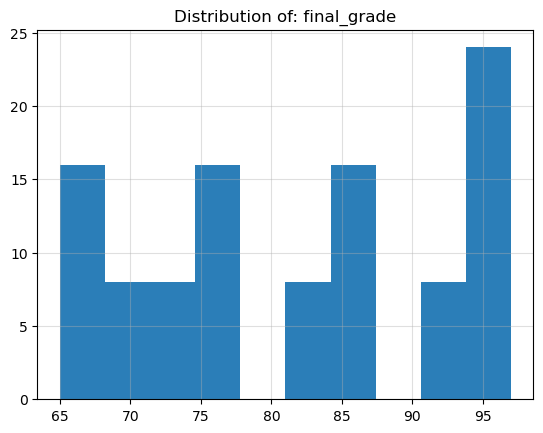

In [31]:
cols = df.columns

for col in cols:
    plt.hist(df[col],alpha=0.95)
    plt.grid(alpha=0.4)
    plt.title(f'Distribution of: {col}')
    plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

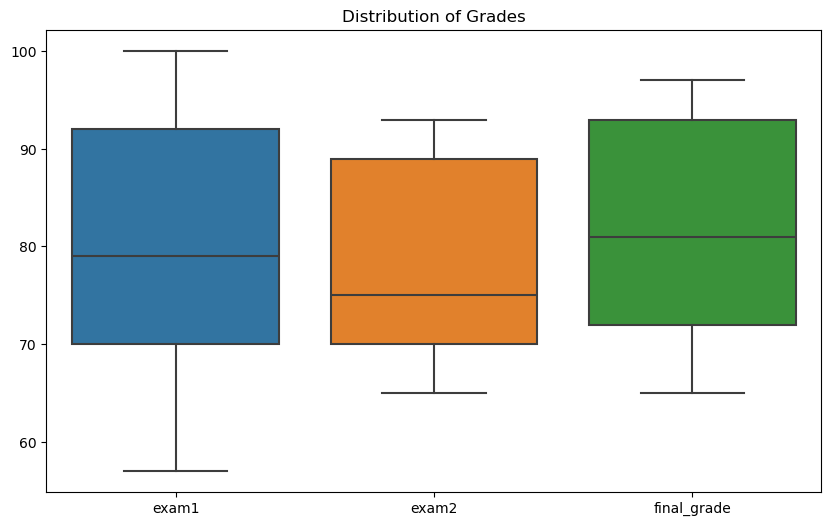

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns='student_id'))
plt.title('Distribution of Grades')
plt.show()

In [49]:
# begin list of functions we'll add into the wrangle.py file
write_contents = []

In [63]:
def wrangle_exams():
    """
    Pull in and prepare the student exams dataset. Returns a prepared dataframe containing student exam test scores.
    
    Parameters:
    -----------
    none
    """
    
    file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
    
    df = pd.read_csv(file)
    
    df.exam3 = df.exam3.replace(' ',np.nan)
    df = df.dropna()
    
    df.exam1 = df.exam1.astype(int)
    df.exam3 = df.exam3.astype(int)
    
    return df

In [53]:
fresh_df = wrangle_exams()

In [57]:
fresh_df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [59]:
wrangle.df_info(fresh_df)

,nunique,dtypes,isnull,68
student_id,102,int64,0,69
exam1,12,int64,0,83
exam2,8,int64,0,80
exam3,10,int64,0,86
final_grade,13,int64,0,85


In [61]:
wrangle.print_libs()

import itertools -> iterations
from tqdm import tqdm -> progress bars on for loopsimport pandas as pd -> large scale database work
import numpy as np -> advanced numerical work
import matplotlib.pyplot as plt -> plotting work
import seaborn as sns -> advanced and intuitive plotting
from scipy import stats -> statistical work
from pydataset import data -> list of datasets
import os -> operating system work
import warnings -> getting rid of pesky warnings
from sklearn import metrics -> model metrics
from sklearn.impute import SimpleImputer -> dynamic value filling
from sklearn.model_selection import train_test_split -> splitting datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree -> DT modeling
from sklearn.neighbors import KNeighborsClassifier -> KNN modeling
from sklearn.ensemble import RandomForestClassifier -> RF modeling
from sklearn.linear_model import LogisticRegression -> LR modeling


In [65]:
write_contents.append('''
def wrangle_exams():
    """
    Pull in and prepare the student exams dataset. Returns a prepared dataframe containing student exam test scores.
    
    Parameters:
    -----------
    none
    """
    
    file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
    
    df = pd.read_csv(file)
    
    df.exam3 = df.exam3.replace(' ',np.nan)
    df = df.dropna()
    
    df.exam1 = df.exam1.astype(int)
    df.exam3 = df.exam3.astype(int)
    
    return df
''')